## Analisis de Datos Exploratorio de los datos de texto

In [1]:
import os, glob, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%writefile utils.py
from typing import List
import pandas as pd

def print_messages(msgs:List[dict]):
    """
    Print the messages of a subject
    
    Messages are a list of dictionaries of the form: [{'id_message': {int_id}, 'message': '{str_message}', 'date': '{str_date}'}, ...]
    and are attached to an specific subject.
    """
    for message in msgs:
        print(f"{message['date']} - {message['message']}")

def load_data(files, truth):
    """load all the data into a dataframe"""
    import os, json
    data = []
    for f in files:
        with open(f) as file:
            msgs = json.load(file)
            for msg in msgs:
                data.append([os.path.basename(f).split('.')[0], msg['id_message'], msg['date'], msg['message']])
    df = pd.DataFrame(data, columns=['subject_id', 'id_message', 'date', 'message'])
    df = df.merge(truth, on='subject_id')
    return df

Overwriting utils.py


In [3]:
from utils import print_messages, load_data
# Read in the data
train_dir = 'data/train/'
trial_dir = 'data/trial/'
truth_dir = 'golden_truth/'
task = 'a'

train_files = glob.glob(train_dir + '*.json')
trial_files = glob.glob(trial_dir + '*.json')
train_truth = pd.read_csv(os.path.join(train_dir, truth_dir, 'task2_gold_{}.txt'.format(task))).rename(columns={'Subject': 'subject_id'})
trial_truth = pd.read_csv(os.path.join(trial_dir, truth_dir, 'task2_gold_{}.txt'.format(task))).rename(columns={'Subject': 'subject_id'})

print('Number of training files: {}'.format(len(train_files)))
print('Number of trial files: {}'.format(len(trial_files)))

# show one example
with open(train_files[1]) as f:
    msgs = json.load(f)
    print(f"{os.path.basename(train_files[0].split('.')[0])} messages:\n")
    print_messages(msgs)

# Read in the data
for task in ['a', 'b', 'c', 'd']:
    truth_path = os.path.join(train_dir, truth_dir, 'task2_gold_{}.txt'.format(task))
    truth = pd.read_csv(truth_path).rename(columns={'Subject': 'subject_id'}).rename(columns={'Subject': 'subject_id'})
    if task=='a':
        train_df = load_data(train_files, train_truth.astype({"label": str}))
    else:
        train_df = pd.merge(train_df, truth, on='subject_id')

train_df = train_df.rename(columns={col: f'{task}_{col}' for col in truth.columns.drop('subject_id')})
print('Number of training messages: {}'.format(len(train_df)))
display(train_df.head())

Number of training files: 175
Number of trial files: 10
subject264 messages:

2020-02-21 17:51:23 - Y de q hablan
2020-02-21 17:52:31 - De donde son ud
2020-02-21 17:57:17 - Yo soy de cuba
2020-02-21 18:09:30 - Y q edades tienen
2020-02-21 18:13:34 - Disculpa la pregunta pero ... eres una chica no ?
2020-02-21 18:19:44 - Que callados están aqui
2020-02-21 18:33:42 - Yo estoy conversando con un amigo q me altera
2020-02-21 18:49:38 - No le hagas caso y ya
2020-02-21 18:49:52 - La ignorancia duele mas q una respuesta
2020-02-23 20:54:38 - Mi novio y yo acabamos de tener una pelea muy fuerte y lo hemos dejado
2020-02-23 20:57:33 - El ya no me presta la atencion q al principio
2020-02-23 20:57:40 - Discutimos y se fue para no se donde
2020-02-23 20:57:48 - Me dijo q venia en unos minutos
2020-02-23 20:58:08 - Cuando me iba me lo encontre en la calle con una chica
2020-02-23 20:58:21 - Le grite y me fui
2020-02-23 21:36:53 - Eso es aun peor
Number of training messages: 6248


,subject_id,id_message,date,message,label_x,label_y,label,d_suffer_in_favour,d_suffer_against,d_suffer_other,d_control
0,subject264,18857139074,2020-10-16 07:04:25,Alguien que quiera charlar ?,1,1.0,suffer+against,0.3,0.4,0.3,0.0
1,subject264,88125635023,2020-10-16 07:08:52,"Cualquier tema , dime uno ?",1,1.0,suffer+against,0.3,0.4,0.3,0.0
2,subject264,71020101646,2020-10-16 07:11:24,Me vienen tantos temas a la caber,1,1.0,suffer+against,0.3,0.4,0.3,0.0
3,subject264,36094304832,2020-10-16 07:13:53,El nombre de este grupo es depresión y tristez...,1,1.0,suffer+against,0.3,0.4,0.3,0.0
4,subject264,84560450147,2020-10-16 07:19:47,Y que hiciste para solucionarlo ?,1,1.0,suffer+against,0.3,0.4,0.3,0.0


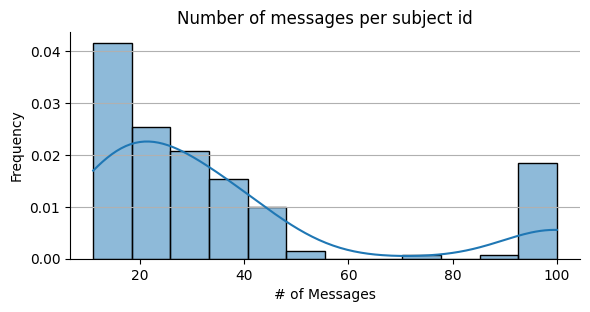

In [4]:
# Plot the histogram of the number of messages per subject
ax =sns.displot(train_df.groupby('subject_id').count()['id_message'], kde=True, stat='density', aspect=2, height=3)
ax.set(title='Number of messages per subject id', xlabel='# of Messages', ylabel='Frequency')
# plt.grid()
plt.grid(axis='y')
plt.show()
# ax = sns.displot(trial_df.groupby('subject_id').count()['id_message'], kde=True, stat='density', aspect=2, height=3)
# ax.set(title='Trial: Number of messages per subject id', xlabel='# of Messages', ylabel='Frequency')
# plt.show()

/var/folders/jj/p12jwj113hv_73vsjrcjcw040000gn/T/ipykernel_29175/2966168058.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='center')


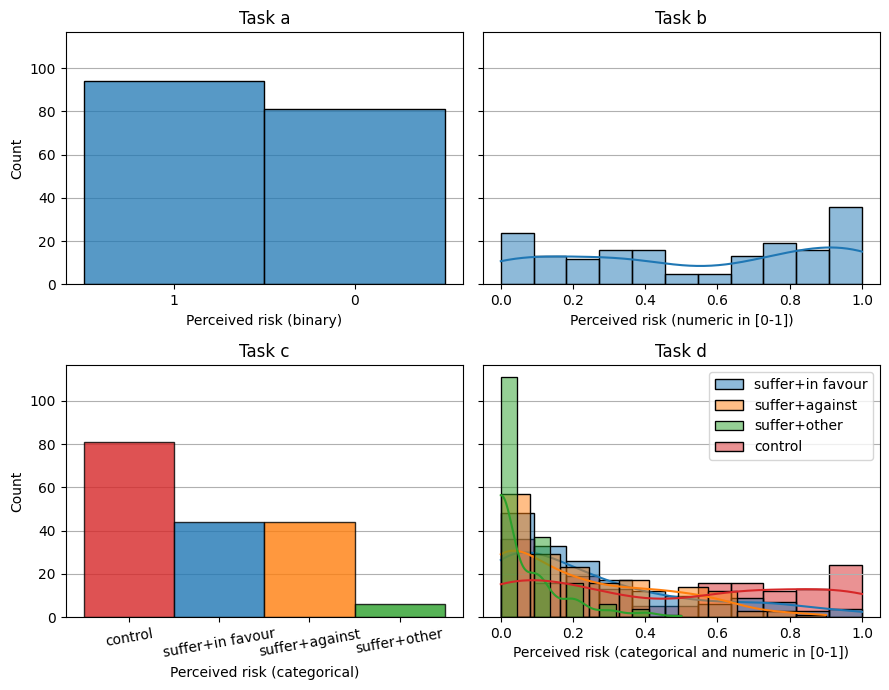

In [22]:
# plot the distributions of each task label
colors_dict = {
    'control': 'tab:red',
    'suffer+in favour': 'tab:blue',
    'suffer+against': 'tab:orange',
    'suffer+other': 'tab:green',
}
task_xlabel = {
    'a': 'Perceived risk (binary)',
    'b': 'Perceived risk (numeric in [0-1])',
    'c': 'Perceived risk (categorical)',
    'd': 'Perceived risk (categorical and numeric in [0-1])'
}
train_df_grouped = train_df.groupby('subject_id').first()
train_df_grouped[f'c_label'] = pd.Categorical(train_df_grouped[f'c_label'], categories=colors_dict.keys())
fig, axes = plt.subplots(2, 2, figsize=(9, 7), sharey=True)
for task, ax in zip(['a', 'b', 'c'], axes[:4].flatten()):
    # grid with only horizontal lines
    ax.grid(axis='y')
    # plot the histogram with 10 bins
    sns.histplot(train_df_grouped[f'{task}_label'], ax=ax, kde=task=='b', zorder=2, bins=11)
    ax.set(title=f'Task {task}', ylabel='Count', xlabel=task_xlabel[task])
    # orient the labels 10 degrees and center them
    if task=='c':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='center')
        # color the bars according to the label
        for bar, color in zip(ax.patches, colors_dict.values()):
            bar.set_color(color)
            bar.set_edgecolor('black')
            bar.set_alpha(0.8)
        # ax.legend(colors_dict.keys())
# plt.grid()
ax = axes[-1][-1]
ax.grid(axis='y')
sns.histplot(train_df_grouped[f'd_suffer_in_favour'], label='suffer+in favour', zorder=2, kde=True, ax=ax, bins=11)
sns.histplot(train_df_grouped[f'd_suffer_against'], label='suffer+against', zorder=2, kde=True, ax=ax, bins=11)
sns.histplot(train_df_grouped[f'd_suffer_other'], label='suffer+other', zorder=2, kde=True, ax=ax, bins=11)
sns.histplot(train_df_grouped[f'd_control'], label='control', zorder=1, kde=True, ax=ax, bins=11)
ax.set(xlabel=task_xlabel['d'], ylabel='Count', title='Task d')
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
train_df_grouped[train_df.columns[train_df.columns.str.startswith('d_')]].apply(np.argmax,axis=1).replace(
    dict(enumerate(train_df.columns[train_df.columns.str.startswith('d_')]))
).str.replace('^d_', '', regex=True).value_counts()

control             87
suffer_in_favour    43
suffer_against      41
suffer_other         4
dtype: int64

In [72]:
d_cols = train_df.columns[train_df.columns.str.startswith('d_')]
sim_c_task = train_df_grouped[d_cols].assign(
    sim_c=lambda df: df.iloc[:, :3].apply(
        lambda x: df.columns[np.argmax(x)] if sum(x)>=0.5 else 'control', axis=1)
).sim_c.str.replace('^d_', '', regex=True).str.replace('suffer_', 'suffer+').str.replace('_', ' ')
sim_c_task.head(10)

subject_id
subject101    suffer+in favour
subject104    suffer+in favour
subject106    suffer+in favour
subject108    suffer+in favour
subject109             control
subject11              control
subject110    suffer+in favour
subject111             control
subject112    suffer+in favour
subject113    suffer+in favour
Name: sim_c, dtype: object